# MIMIC III Exploration

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import psycopg2

from matplotlib import pyplot as plt

## Get Connection

In [3]:
# information used to create a database connection
sqluser = 'postgres'
dbname = 'mimic'
hostname = 'localhost'
port_number = 5434
schema_name = 'public'

# Connect to postgres with a copy of the MIMIC-III database
con = psycopg2.connect(dbname=dbname, user=sqluser, host=hostname, port=port_number, password='mysecretpassword')

# the below statement is prepended to queries to ensure they select from the right schema
query_schema = 'set search_path to ' + schema_name + ';'

## Gender Distribution

In [4]:
genderQry = query_schema + \
"""
SELECT gender, COUNT(*) AS cnt FROM public.patients GROUP BY gender;
"""
genderDf = pd.read_sql_query(genderQry, con)

In [5]:
genderDf

,gender,cnt
0,M,26121
1,F,20399


Text(0.5, 1.0, 'Gender Piechart')

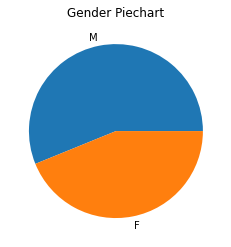

In [6]:
fig, ax = plt.subplots()
plt.pie(genderDf.cnt, labels=genderDf.gender)
ax.set_title('Gender Piechart')

## Age Distribution

In [7]:
ageQry = query_schema + \
"""
SELECT DATE_PART('year', AGE(adm.admittime, pat.dob)) AS age FROM public.patients pat INNER JOIN public.admissions adm ON pat.subject_id = adm.subject_id;
"""
ageDf = pd.read_sql_query(ageQry, con)

Text(0, 0.5, 'Count')

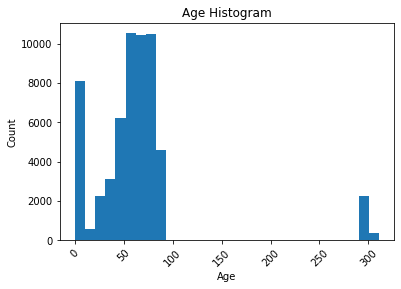

In [8]:
fig, ax = plt.subplots()
plt.xticks(rotation = 45)
plt.hist(ageDf.age, bins=30)

ax.set_title('Age Histogram')
ax.set_xlabel('Age')
ax.set_ylabel('Count')


## Admission Type

In [9]:
atQry = query_schema + \
"""
SELECT admission_type, COUNT(*) AS cnt FROM public.admissions GROUP BY admission_type;
"""
atDf = pd.read_sql_query(atQry, con)

In [10]:
atDf

,admission_type,cnt
0,URGENT,1336
1,NEWBORN,7863
2,ELECTIVE,7706
3,EMERGENCY,42071


Text(0.5, 0, 'Admission Type')

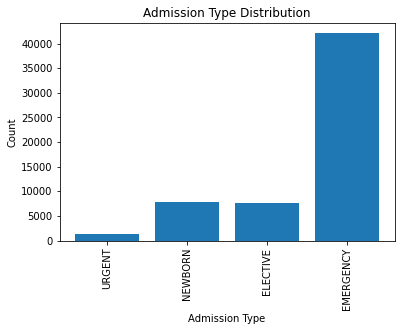

In [11]:
fig, ax = plt.subplots()
plt.xticks(rotation = 90)
plt.bar(x=atDf.admission_type, height=atDf.cnt)

ax.set_title('Admission Type Distribution')
ax.set_ylabel('Count')
ax.set_xlabel('Admission Type')

## Admission Location

In [12]:
alQry = query_schema + \
"""
SELECT admission_location, COUNT(*) AS cnt FROM public.admissions GROUP BY admission_location;
"""
alDf = pd.read_sql_query(alQry, con)

In [13]:
alDf.dropna(inplace=True)

In [14]:
alDf

,admission_location,cnt
0,CLINIC REFERRAL/PREMATURE,12032
1,** INFO NOT AVAILABLE **,204
2,TRANSFER FROM HOSP/EXTRAM,8456
3,EMERGENCY ROOM ADMIT,22754
4,TRANSFER FROM SKILLED NUR,273
5,PHYS REFERRAL/NORMAL DELI,15079
6,TRANSFER FROM OTHER HEALT,71
7,HMO REFERRAL/SICK,102
8,TRSF WITHIN THIS FACILITY,5


Text(0.5, 0, 'Admission Location')

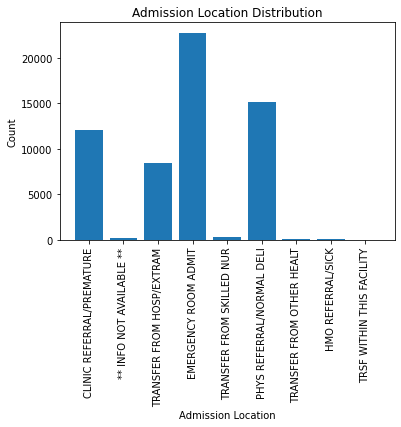

In [15]:
fig, ax = plt.subplots()
plt.xticks(rotation = 90)
plt.bar(x=alDf.admission_location, height=alDf.cnt)

ax.set_title('Admission Location Distribution')
ax.set_ylabel('Count')
ax.set_xlabel('Admission Location')

## Discharge Location

In [16]:
dischargeQry = query_schema + \
"""
SELECT discharge_location, COUNT(*) AS cnt FROM public.admissions GROUP BY discharge_location;
"""
dischargeDf = pd.read_sql_query(dischargeQry, con)

In [17]:
dischargeDf.dropna(inplace=True)

In [18]:
dischargeDf

,discharge_location,cnt
0,ICF,47
1,HOSPICE-MEDICAL FACILITY,153
2,DISC-TRAN CANCER/CHLDRN H,669
3,DEAD/EXPIRED,5854
4,HOME,18962
5,LEFT AGAINST MEDICAL ADVI,365
6,SNF-MEDICAID ONLY CERTIF,1
7,REHAB/DISTINCT PART HOSP,6429
8,HOME WITH HOME IV PROVIDR,67
9,DISC-TRAN TO FEDERAL HC,11


Text(0.5, 0, 'Discharge Location')

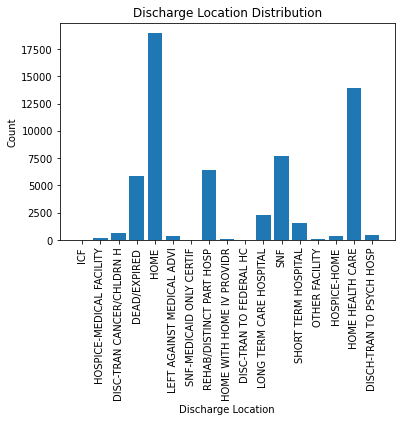

In [19]:
fig, ax = plt.subplots()
plt.xticks(rotation = 90)
plt.bar(x=dischargeDf.discharge_location, height=dischargeDf.cnt)

ax.set_title('Discharge Location Distribution')
ax.set_ylabel('Count')
ax.set_xlabel('Discharge Location')

## Ethnicity Distribution

In [20]:
ethnicityQry = query_schema + \
"""
SELECT ethnicity, COUNT(*) AS cnt FROM public.admissions GROUP BY ethnicity;
"""
ethnicityDf = pd.read_sql_query(ethnicityQry, con)

In [21]:
ethnicityDf

,ethnicity,cnt
0,BLACK/HAITIAN,101
1,PORTUGUESE,61
2,SOUTH AMERICAN,8
3,HISPANIC/LATINO - SALVADORAN,19
4,HISPANIC/LATINO - COLOMBIAN,9
5,BLACK/AFRICAN,44
6,WHITE - OTHER EUROPEAN,81
7,HISPANIC/LATINO - CENTRAL AMERICAN (OTHER),13
8,ASIAN - VIETNAMESE,53
9,CARIBBEAN ISLAND,9


([<matplotlib.patches.Wedge at 0x7fd773275fa0>,
 [Text(1.0999840796178568, 0.005918157420724061, 'BLACK/HAITIAN'),
  Text(1.0998920516054935, 0.015410217878364628, 'PORTUGUESE'),
  Text(1.0998279809100986, 0.019452825173127637, 'SOUTH AMERICAN'),
  Text(1.0997988650885377, 0.02103464641880634, 'HISPANIC/LATINO - SALVADORAN'),
  Text(1.0997662679080686, 0.022675007641862508, 'HISPANIC/LATINO - COLOMBIAN'),
  Text(1.0996978676201679, 0.02577983614486186, 'BLACK/AFRICAN'),
  Text(1.0995018318992582, 0.03310168651557518, 'WHITE - OTHER EUROPEAN'),
  Text(1.0993222991482414, 0.03860676877731063, 'HISPANIC/LATINO - CENTRAL AMERICAN (OTHER)'),
  Text(1.09917977342869, 0.04247146907340867, 'ASIAN - VIETNAMESE'),
  Text(1.099033509346503, 0.04610146780212644, 'CARIBBEAN ISLAND'),
  Text(1.098948210348027, 0.04809190132308053, 'WHITE - EASTERN EUROPEAN'),
  Text(1.0913338079874386, 0.13780609400036306, 'OTHER'),
  Text(1.0551521647770468, 0.3108921182119483, 'ASIAN'),
  Text(1.0266974920666168, 

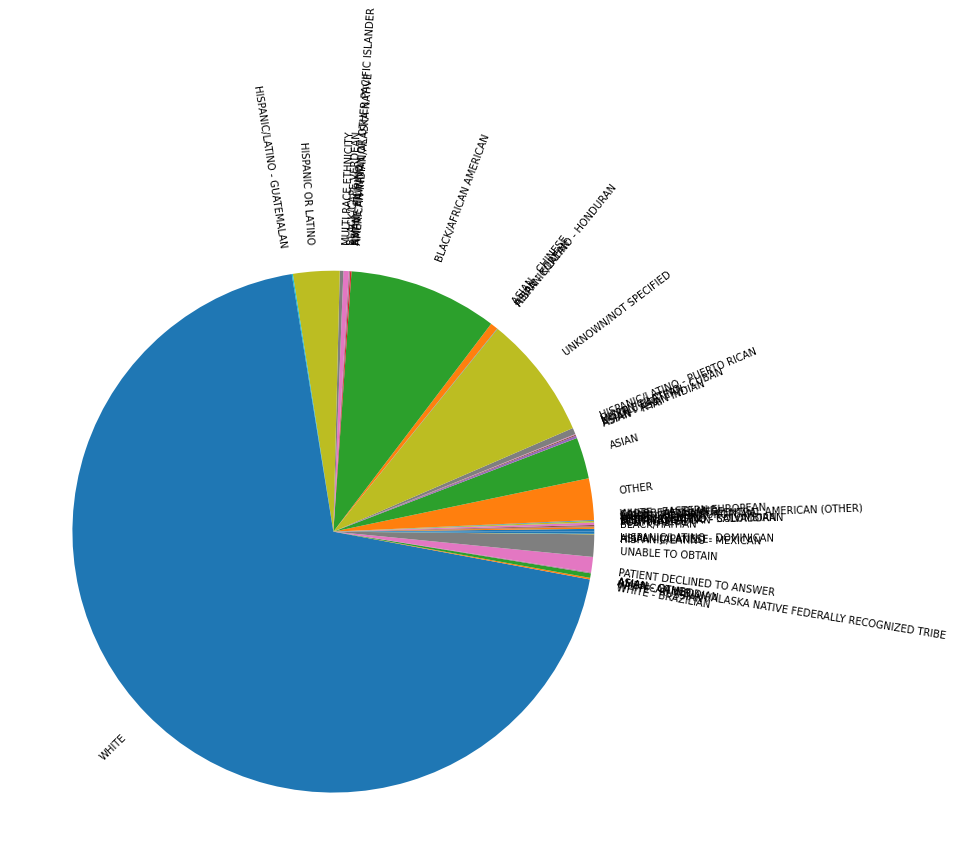

In [27]:
fig, ax = plt.subplots(figsize=(12, 12))
plt.pie(ethnicityDf.cnt, labels=ethnicityDf.ethnicity, rotatelabels = True)
# ax.set_title('Ethnicity Piechart')